In [2]:
import pandas as pd
import matplotlib.pyplot as plt



## Data Loading


In [3]:
df = pd.read_csv('../data/sales_data.csv')
df.head()


,OrderID,OrderDate,Product,Category,Quantity,Price
0,1001,2023-01-05,Laptop,Electronics,2,55000
1,1002,2023-01-08,Mobile,Electronics,3,20000
2,1003,2023-02-02,Headphones,Accessories,5,1500
3,1004,2023-02-10,Laptop,Electronics,1,55000
4,1005,2023-03-12,Chair,Furniture,4,3000


## Data Cleaning & Feature Engineering


In [4]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Revenue'] = df['Quantity'] * df['Price']
df.head()


,OrderID,OrderDate,Product,Category,Quantity,Price,Revenue
0,1001,2023-01-05,Laptop,Electronics,2,55000,110000
1,1002,2023-01-08,Mobile,Electronics,3,20000,60000
2,1003,2023-02-02,Headphones,Accessories,5,1500,7500
3,1004,2023-02-10,Laptop,Electronics,1,55000,55000
4,1005,2023-03-12,Chair,Furniture,4,3000,12000


In [5]:
total_revenue = df['Revenue'].sum()
total_revenue


np.int64(408000)

## Revenue Analysis


In [6]:
product_revenue = (
    df.groupby('Product')['Revenue']
      .sum()
      .sort_values(ascending=False)
)

product_revenue


Product
Laptop        275000
Mobile         80000
Chair          27000
Table          14000
Headphones     12000
Name: Revenue, dtype: int64

In [7]:
df['Month'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales


Month
2023-01    170000
2023-02     62500
2023-03     26000
2023-04     24500
2023-05    125000
Freq: M, Name: Revenue, dtype: int64

## Data Visualization


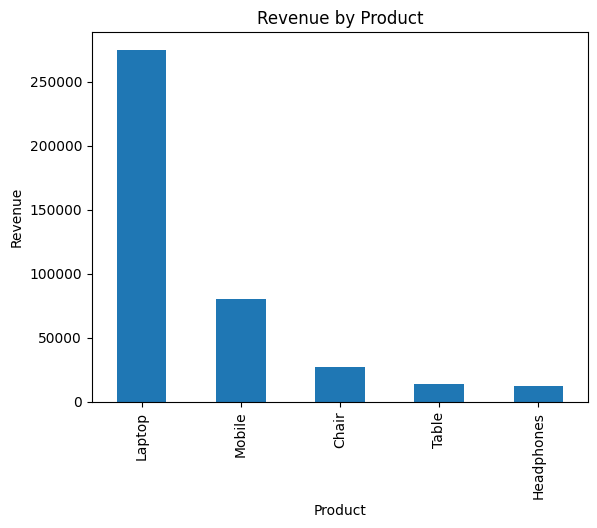

In [8]:
plt.figure()
product_revenue.plot(kind='bar')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()


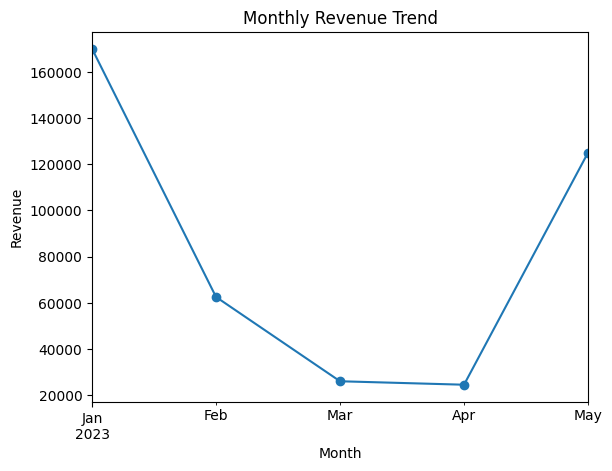

In [9]:
plt.figure()
monthly_sales.plot(marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


## Key Insights

- Laptops generate the highest revenue, making them the most profitable product.
- The Electronics category dominates overall sales performance.
- Monthly revenue shows a generally increasing trend, indicating positive business growth.
